In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [378]:
# Imports for better visualization
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [379]:
pd.set_option('max_columns',100)
pd.set_option('max_rows',100)

In [380]:
train = pd.read_excel("Epsilon'20_dataset.xlsx", sheet_name = 'train')
test = pd.read_excel("Epsilon'20_dataset.xlsx", sheet_name = 'test')
train.shape, test.shape

((804, 17), (203, 16))

In [381]:
train = train.rename(columns={'Marital_status ':'Marital_status', 'Emp_duration ':'Emp_duration'})
test = test.rename(columns={'Marital_status ':'Marital_status', 'Emp_duration ':'Emp_duration'})

In [382]:
train = train.loc[np.where(train['Default'].isnull()==False)].reset_index(drop=True)
train.shape

(803, 17)

In [383]:
train.isnull().sum()

ID                  0
Default             0
Checking_amount     0
Term                1
Credit_score        2
Gender              0
Marital_status      0
Car_loan            1
Personal_loan       2
Home_loan           2
Education_loan      1
Emp_status          0
Amount              0
Saving_amount       0
Emp_duration        3
Age                 0
No_of_credit_acc    1
dtype: int64

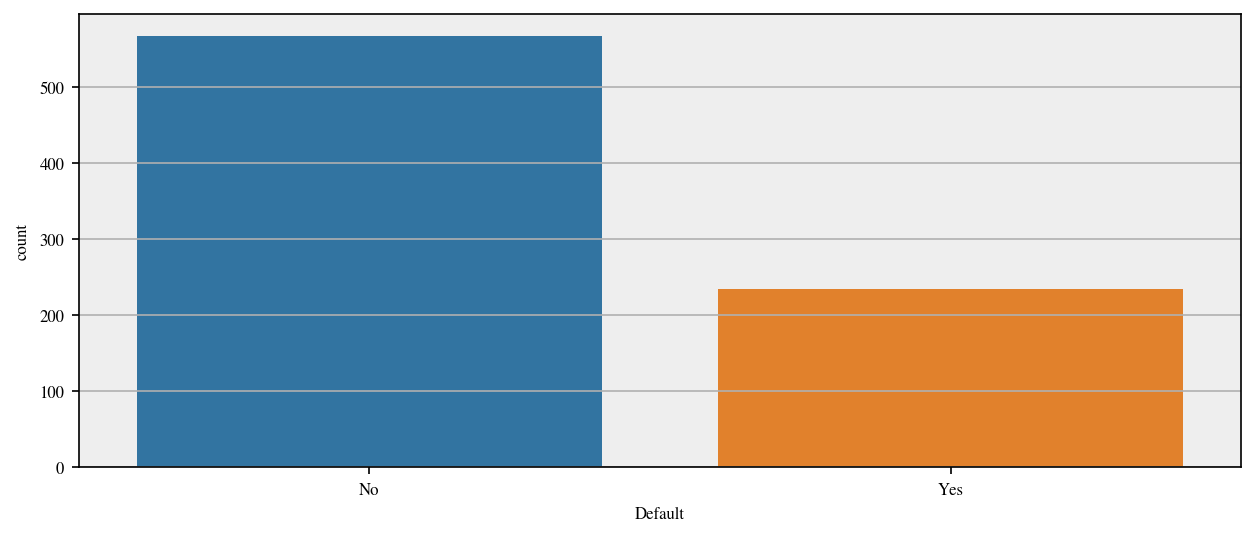

In [384]:
sns.countplot(train['Default'])

In [385]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Default'] = le.fit_transform(train['Default'])

In [386]:
cat_cols = train.select_dtypes(include='object').columns
num_cols = test.select_dtypes(exclude='object').columns
len(cat_cols), len(num_cols)

(7, 9)

In [387]:
data = pd.concat([train, test])
data.shape

(1006, 17)

In [388]:
data.isnull().sum()

ID                    0
Default             203
Checking_amount       1
Term                  1
Credit_score          3
Gender                0
Marital_status        1
Car_loan              2
Personal_loan         2
Home_loan             4
Education_loan        3
Emp_status            0
Amount                1
Saving_amount         1
Emp_duration          5
Age                   0
No_of_credit_acc      2
dtype: int64

In [389]:
data.loc[data['Checking_amount'].isnull()==True]

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
182,1183,NaN,NaN,15.0,840.0,Male,Married,No,Yes,NaN,NaN,unemployed,971.0,3105.0,NaN,30.0,2.0


In [390]:
data.loc[(data['Term']==15)&(data['Gender']=='Male')&(data['Marital_status']=='Married')&(data['Car_loan']=='No')&\
        (data['Personal_loan']=='Yes')&(data['Emp_status']=='unemployed')&(data['Age']==30)]

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
58,1059,NaN,706.0,15.0,842.0,Male,Married,No,Yes,No,No,unemployed,1150.0,3673.0,25.0,30.0,1.0
100,1101,NaN,72.0,15.0,765.0,Male,Married,No,Yes,No,No,unemployed,1237.0,3111.0,70.0,30.0,9.0
181,1182,NaN,188.0,15.0,841.0,Male,Married,No,Yes,No,No,unemployed,970.0,3105.0,20.0,30.0,2.0
182,1183,NaN,NaN,15.0,840.0,Male,Married,No,Yes,NaN,NaN,unemployed,971.0,3105.0,NaN,30.0,2.0


In [391]:
data['Checking_amount'] = data['Checking_amount'].fillna(322.0)

In [392]:
mask = (data['Term']==15)&(data['Gender']=='Male')&(data['Marital_status']=='Married')&(data['Car_loan']=='No')&\
        (data['Personal_loan']=='Yes')&(data['Emp_status']=='unemployed')&(data['Age']==30)

In [393]:
data.loc[mask, 'Home_loan'] = data.loc[mask, 'Home_loan'].fillna('No')
data.loc[mask, 'Home_loan'].value_counts()

No    4
Name: Home_loan, dtype: int64

In [394]:
data.loc[np.where(data['Term'].isnull()==True)]

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
278,379,0.0,476.0,NaN,845.0,Male,Single,No,NaN,No,NaN,employed,1622.0,3331.0,NaN,32.0,1.0


In [395]:
mask1 = (data['Gender']=='Male')&(data['Marital_status']=='Single')&(data['Car_loan']=='No')&(data['No_of_credit_acc']==1)\
        &(data['Home_loan']=='No')&(data['Emp_status']=='employed')&(data['Age']==32)
data.loc[mask1, 'Term'] = data.loc[mask1, 'Term'].fillna(18)

In [396]:
data.iloc[np.where(data['Marital_status'].isnull()==True)]

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
121,1122,NaN,373.0,15.0,NaN,Male,NaN,No,Yes,No,NaN,unemployed,720.0,NaN,47.0,36.0,NaN


In [397]:
# data.loc[(data['Gender']=='Male')&(data['Car_loan']=='No')&(data['Personal_loan']=='Yes')&(data['Home_loan']=='No')\
#         &(data['Emp_status']=='unemployed')&(data['Age']==36)]

In [398]:
data['Marital_status'] = data['Marital_status'].fillna('Married')

In [399]:
data.iloc[np.where(data['Car_loan'].isnull()==True)]

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
495,596,0.0,824.0,18.0,NaN,Female,Single,NaN,Yes,NaN,0,unemployed,1279.0,3064.0,NaN,33.0,NaN
53,1054,NaN,273.0,20.0,751.0,Male,Married,NaN,No,NaN,No,unemployed,NaN,2450.0,NaN,33.0,2.0


In [400]:
mask2 = (data['Emp_status']=='unemployed')&(data['Age']==33)&(data['Gender']=='Female')&(data['Marital_status']=='Single')\
        &(data['Personal_loan']=='Yes')

In [401]:
mask2

0      False
1      False
2      False
3      False
4      False
       ...  
198    False
199    False
200    False
201    False
202    False
Length: 1006, dtype: bool

In [402]:
data.loc[mask2, 'Credit_score'] = data.loc[mask2, 'Credit_score'].fillna(783)
data.loc[mask2, 'Car_loan'] = data.loc[mask2, 'Car_loan'].fillna('No')
data.loc[mask2, 'Home_loan'] = data.loc[mask2, 'Home_loan'].fillna('No')
data.loc[mask2, 'Emp_duration'] = data.loc[mask2, 'Emp_duration'].fillna(53)
data.loc[mask2, 'No_of_credit_acc'] = data.loc[mask2, 'No_of_credit_acc'].fillna(2)

In [403]:
data.loc[(data['Emp_status']=='unemployed')&(data['Age']==33)&(data['Gender']=='Male')&(data['Marital_status']=='Married')\
        &(data['Personal_loan']=='No')&(data['Term']==20)]

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
446,547,0.0,245.0,20.0,768.0,Male,Married,Yes,No,No,0,unemployed,1719.0,3388.0,67.0,33.0,2.0
53,1054,NaN,273.0,20.0,751.0,Male,Married,NaN,No,NaN,No,unemployed,NaN,2450.0,NaN,33.0,2.0
82,1083,NaN,161.0,20.0,866.0,Male,Married,Yes,No,No,No,unemployed,1305.0,3775.0,6.0,33.0,4.0
130,1131,NaN,469.0,20.0,818.0,Male,Married,Yes,No,No,No,unemployed,621.0,3699.0,34.0,33.0,2.0
197,1198,NaN,589.0,20.0,733.0,Male,Married,Yes,No,No,No,unemployed,829.0,3171.0,70.0,33.0,4.0


In [404]:
mask3 = (data['Emp_status']=='unemployed')&(data['Age']==33)&(data['Gender']=='Male')&(data['Marital_status']=='Married')\
        &(data['Personal_loan']=='No')

In [405]:
data.loc[mask3, 'Car_loan'] = data.loc[mask3, 'Car_loan'].fillna('Yes')
data.loc[mask3, 'Home_loan'] = data.loc[mask3, 'Home_loan'].fillna('No')
data.loc[mask3, 'Amount'] = data.loc[mask3, 'Amount'].fillna(1153)
data.loc[mask3, 'Emp_duration'] = data.loc[mask3, 'Emp_duration'].fillna(51)

In [406]:
data.iloc[np.where(data['Personal_loan'].isnull()==True)]

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
64,165,0.0,253.0,20.0,NaN,Male,Single,No,NaN,NaN,No,employed,1058.0,3378.0,NaN,35.0,2.0
278,379,0.0,476.0,18.0,845.0,Male,Single,No,NaN,No,NaN,employed,1622.0,3331.0,NaN,32.0,1.0


In [407]:
data.loc[(data['Gender']=='Male')&(data['Car_loan']=='No')&(data['Marital_status']=='Single')&(data['Emp_status']=='employed')\
        &(data['Age']==35)]['Credit_score'].mean()

804.6

In [408]:
mask4 = (data['Gender']=='Male')&(data['Car_loan']=='No')&(data['Marital_status']=='Single')&(data['Emp_status']=='employed')\
        &(data['Age']==35)&(data['Term']==20)

In [409]:
data.loc[mask4, 'Personal_loan'] = data.loc[mask4, 'Personal_loan'].fillna('Yes')
data.loc[mask4, 'Home_loan'] = data.loc[mask4, 'Home_loan'].fillna('No')
data.loc[mask4, 'Emp_duration'] = data.loc[mask4, 'Emp_duration'].fillna(5)
data.loc[mask4, 'Credit_score'] = data.loc[mask4, 'Credit_score'].fillna(805)

In [410]:
data.loc[(data['Gender']=='Male')&(data['Car_loan']=='No')&(data['Marital_status']=='Single')&(data['Emp_status']=='employed')\
        &(data['Age']==32)]['Emp_duration'].mean()

35.285714285714285

In [411]:
mask5 = (data['Gender']=='Male')&(data['Car_loan']=='No')&(data['Marital_status']=='Single')&(data['Emp_status']=='employed')\
        &(data['Age']==32)
data.loc[mask5, 'Personal_loan'] = data.loc[mask5, 'Personal_loan'].fillna('Yes')
data.loc[mask5, 'Education_loan'] = data.loc[mask5, 'Education_loan'].fillna('No')
data.loc[mask5, 'Emp_duration'] = data.loc[mask5, 'Emp_duration'].fillna(35)

In [412]:
data.iloc[np.where(data['Education_loan'].isnull()==True)]

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
121,1122,NaN,373.0,15.0,NaN,Male,Married,No,Yes,No,NaN,unemployed,720.0,NaN,47.0,36.0,NaN
182,1183,NaN,322.0,15.0,840.0,Male,Married,No,Yes,No,NaN,unemployed,971.0,3105.0,NaN,30.0,2.0


In [413]:
data.loc[(data['Gender']=='Male')&(data['Marital_status']=='Married')&(data['Car_loan']=='No')&(data['Personal_loan']=='Yes')\
        &(data['Home_loan']=='No')&(data['Emp_status']=='unemployed')&(data['Age']==36)]['Credit_score'].mean()

752.6

In [414]:
mask6 = (data['Gender']=='Male')&(data['Marital_status']=='Married')&(data['Car_loan']=='No')&(data['Personal_loan']=='Yes')\
        &(data['Home_loan']=='No')&(data['Emp_status']=='unemployed')&(data['Age']==30)
data.loc[mask6, 'Education_loan'] = data.loc[mask6, 'Education_loan'].fillna(0)
data.loc[mask6, 'Emp_duration'] = data.loc[mask6, 'Emp_duration'].fillna(20)

In [415]:
mask7 = (data['Gender']=='Male')&(data['Marital_status']=='Married')&(data['Car_loan']=='No')&(data['Personal_loan']=='Yes')\
        &(data['Home_loan']=='No')&(data['Emp_status']=='unemployed')&(data['Age']==36)
data.loc[mask7, 'Education_loan'] = data.loc[mask7, 'Education_loan'].fillna(0)
data.loc[mask7, 'No_of_credit_acc'] = data.loc[mask7, 'No_of_credit_acc'].fillna(2.0)
data.loc[mask7, 'Saving_amount'] = data.loc[mask7, 'Saving_amount'].fillna(3300)
data.loc[mask7, 'Credit_score'] = data.loc[mask7, 'Credit_score'].fillna(753)

In [416]:
data.head()

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
0,101,0.0,988.0,15.0,796.0,Female,Single,Yes,No,No,No,employed,1536.0,3455.0,12.0,38.0,1.0
1,102,0.0,458.0,15.0,813.0,Female,Single,Yes,No,No,No,employed,947.0,3600.0,25.0,36.0,1.0
2,103,0.0,158.0,14.0,756.0,Female,Single,No,Yes,No,No,employed,1678.0,3093.0,43.0,34.0,1.0
3,104,1.0,300.0,25.0,737.0,Female,Single,No,No,No,Yes,employed,1804.0,2449.0,0.0,29.0,1.0
4,105,1.0,63.0,24.0,662.0,Female,Single,No,No,No,Yes,unemployed,1184.0,2867.0,4.0,30.0,1.0


In [417]:
data['Gender'] = data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
data['Marital_status'] = data[data.columns[6]].apply(lambda x: 1 if x=='Married' else 0)
data['Car_loan'] = data['Car_loan'].apply(lambda x: 1 if x=='Yes' else 0)
data['Personal_loan'] = data['Personal_loan'].apply(lambda x: 1 if x=='Yes' else 0)
data['Home_loan'] = data['Home_loan'].apply(lambda x: 1 if x=='Yes' else 0)
data['Education_loan'] = data['Education_loan'].replace(['Yes', 'No'], [1, 0])
data['Emp_status'] = data['Emp_status'].apply(lambda x: 1 if x=='unemployed' else 0)

In [418]:
data.head()

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
0,101,0.0,988.0,15.0,796.0,0,0,1,0,0,0,0,1536.0,3455.0,12.0,38.0,1.0
1,102,0.0,458.0,15.0,813.0,0,0,1,0,0,0,0,947.0,3600.0,25.0,36.0,1.0
2,103,0.0,158.0,14.0,756.0,0,0,0,1,0,0,0,1678.0,3093.0,43.0,34.0,1.0
3,104,1.0,300.0,25.0,737.0,0,0,0,0,0,1,0,1804.0,2449.0,0.0,29.0,1.0
4,105,1.0,63.0,24.0,662.0,0,0,0,0,0,1,1,1184.0,2867.0,4.0,30.0,1.0


In [419]:
import seaborn as sns

In [420]:
default_0 = train[train['Default']==0]
default_1 = train[train['Default']==1]

C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


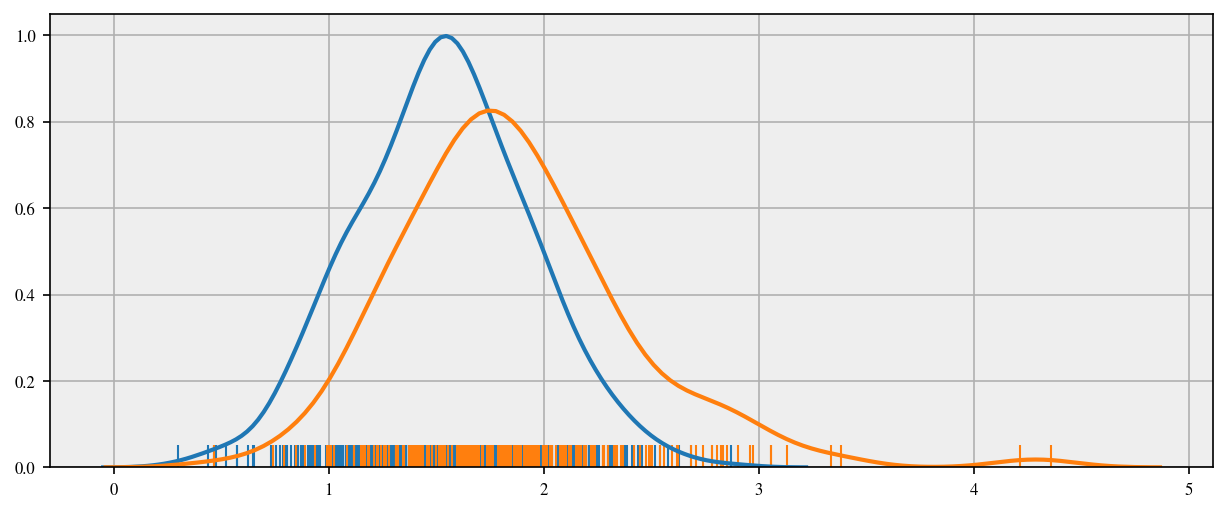

In [421]:
sns.distplot(default_0['Amount']/default_0['Credit_score'], hist=False, rug=True)
sns.distplot(default_1['Amount']/default_1['Credit_score'], hist=False, rug=True)

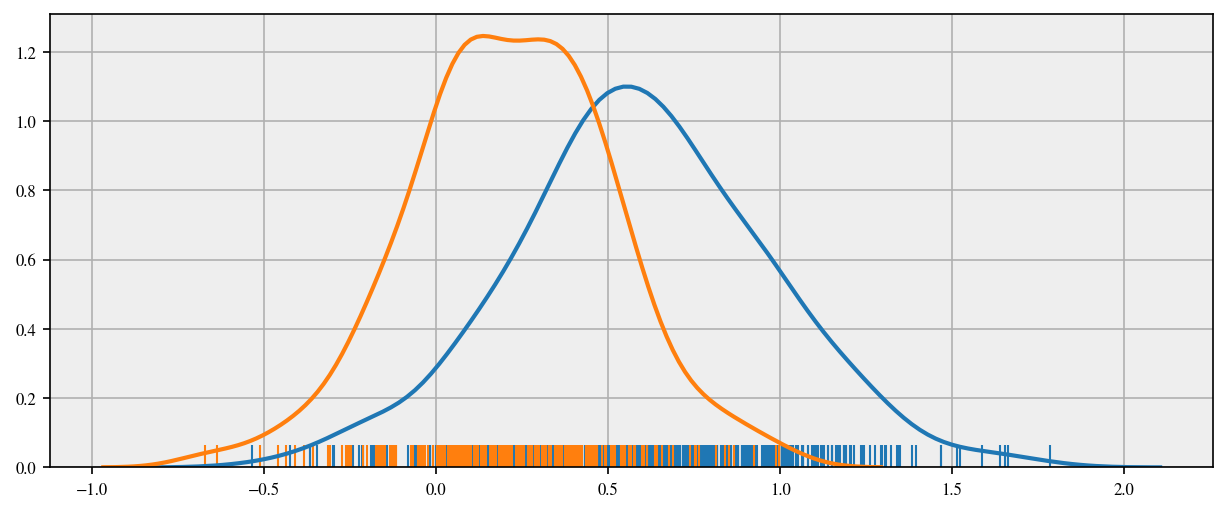

In [422]:
sns.distplot(default_0['Checking_amount']/default_0['Credit_score'], hist=False, rug=True)
sns.distplot(default_1['Checking_amount']/default_1['Credit_score'], hist=False, rug=True)

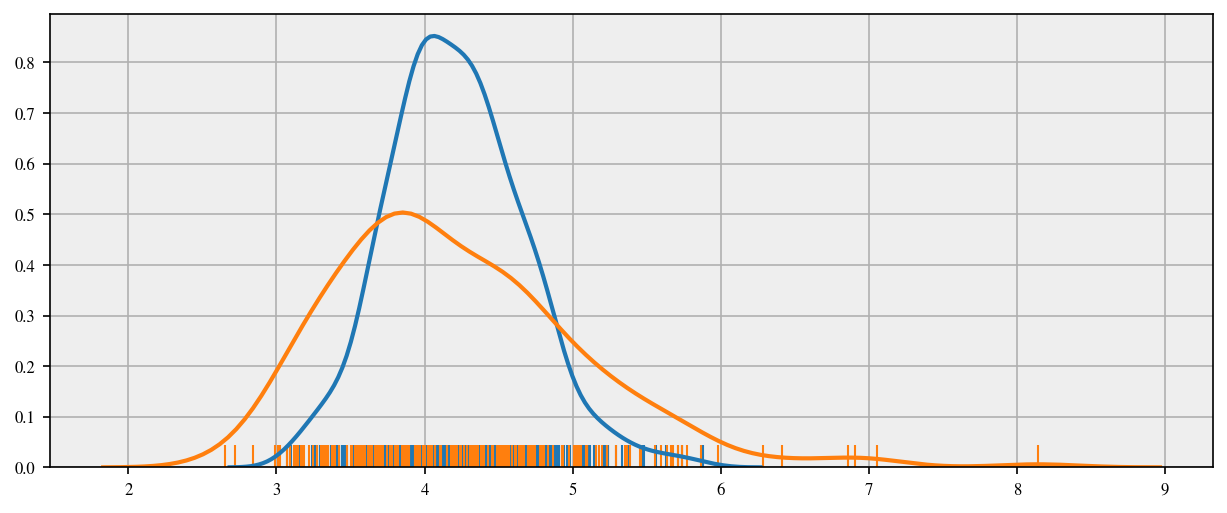

In [423]:
sns.distplot(default_0['Saving_amount']/default_0['Credit_score'], hist=False, rug=True)
sns.distplot(default_1['Saving_amount']/default_1['Credit_score'], hist=False, rug=True)

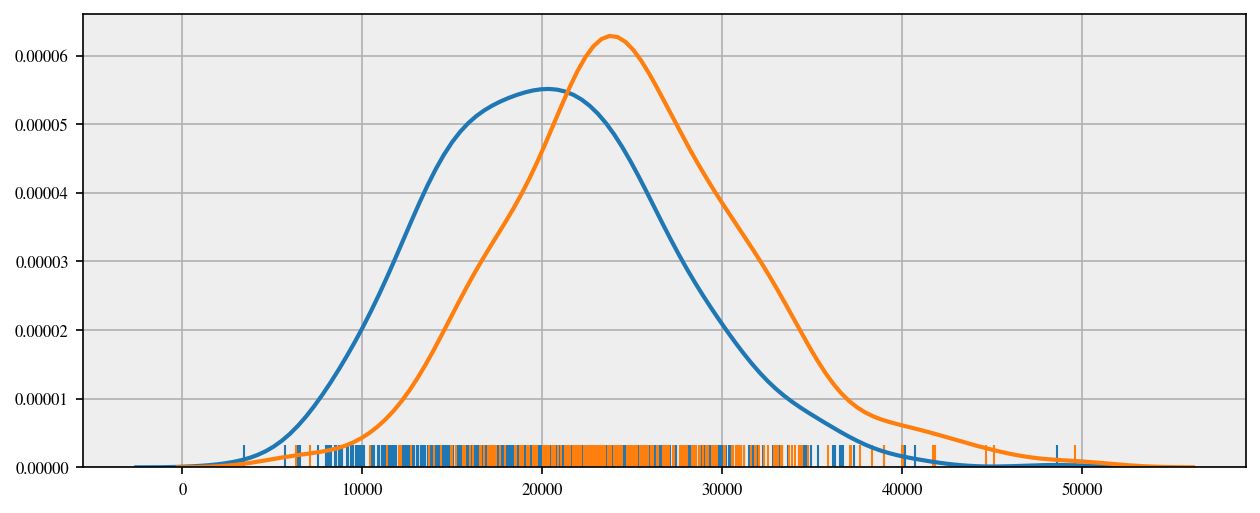

In [424]:
sns.distplot(default_0['Amount']*default_0['Term'], hist=False, rug=True)
sns.distplot(default_1['Amount']*default_1['Term'], hist=False, rug=True)

In [425]:
data['bal_status'] = data['Checking_amount'].apply(lambda x: 1 if x<=0 else 0)
data['bal_status'].value_counts()

0    905
1    101
Name: bal_status, dtype: int64

In [426]:
bal_ct = pd.crosstab(data['Default'], data['bal_status'], normalize='index')*100
bal_ct

bal_status,0,1
Default,,
0.0,94.542254,5.457746
1.0,80.425532,19.574468


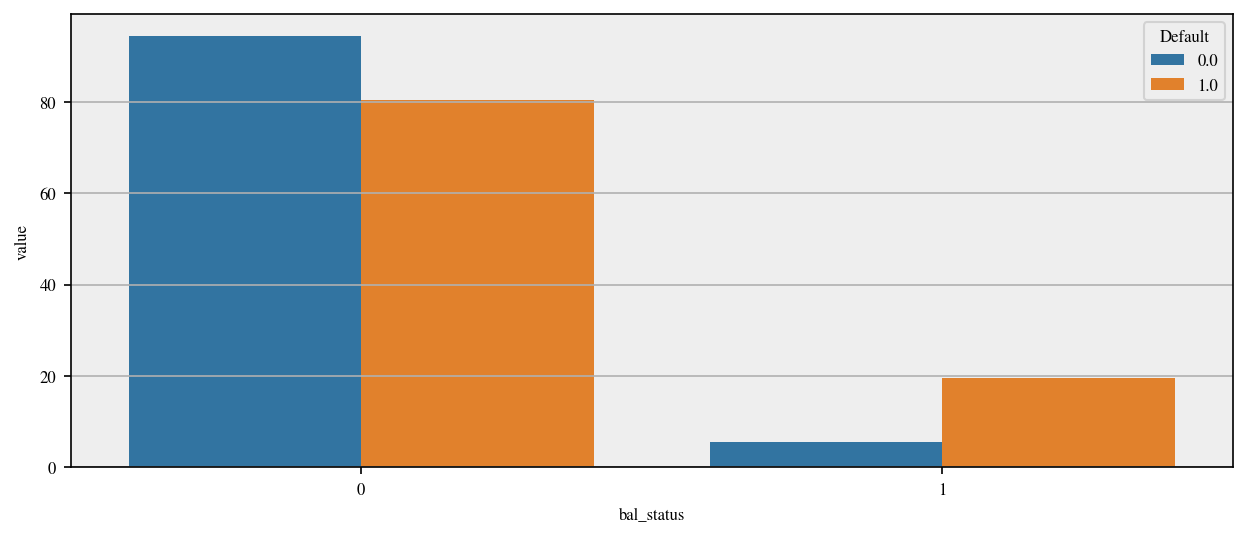

In [427]:
def crosstab_plot(feature,  target, ct):
    stacked = ct.stack().reset_index().rename(columns={0:'value'})
    return sns.barplot(x=stacked[feature], y=stacked.value, hue=stacked[target])

crosstab_plot('bal_status', 'Default', bal_ct)

In [428]:
data['total_bal'] = data['Checking_amount']+data['Saving_amount']
data['total_bal'].describe()

count    1006.000000
mean     3541.576541
std       496.395745
min      2122.000000
25%      3180.000000
50%      3569.500000
75%      3892.750000
max      4961.000000
Name: total_bal, dtype: float64

In [429]:
data['loan_to_tot_bal'] = data['Amount']/data['total_bal']
data['loan_to_saving'] = data['Amount']/data['Saving_amount']

In [430]:
data['loan_to_score'] = data['Amount']/data['Credit_score']

In [431]:
data['total_loan'] = (data['Car_loan']+data['Personal_loan']+data['Home_loan']+data['Education_loan'])
data['total_loan'].value_counts()

1    1001
0       5
Name: total_loan, dtype: int64

In [432]:
data['tot_bal_per_acc'] = data['total_bal']/data['No_of_credit_acc']
data['loan_per_acc'] = data['Amount']/data['No_of_credit_acc']
data['loan_per_term'] = data['Amount']/data['Term']


In [457]:
emp = data[(data['Emp_duration']==0)&(data['Emp_status']==0)]
emp.shape

(11, 30)

In [458]:
emp['Default'].value_counts()

1.0    5
0.0    3
Name: Default, dtype: int64

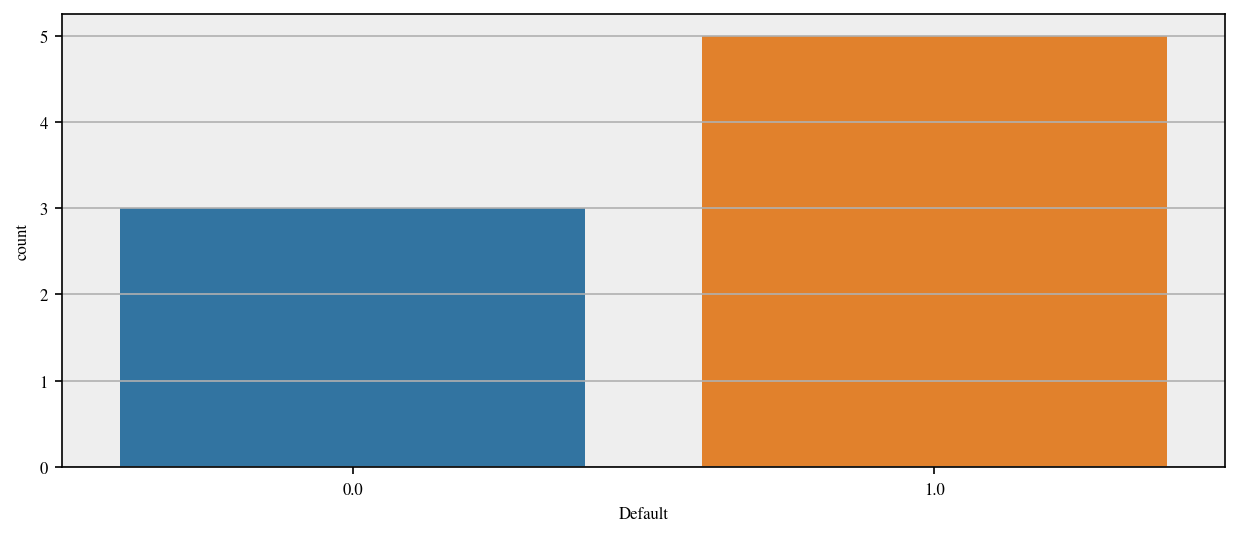

In [435]:
sns.countplot(emp["Default"])

In [445]:
data['credit_score_bins'] = pd.cut(data['Credit_score'], bins=3, labels=['L', 'M', 'H'])
data['credit_score_bins'].value_counts()

M    713
H    253
L     40
Name: credit_score_bins, dtype: int64

In [446]:
pd.cut(data['Credit_score'], bins=3).value_counts()

(593.667, 811.333]    713
(811.333, 1029.0]     253
(375.347, 593.667]     40
Name: Credit_score, dtype: int64

In [437]:
score_ct = pd.crosstab(data['Default'], data['credit_score_bins'], normalize='index')*100
score_ct

credit_score_bins,L,M,H
Default,,,
0.0,0.000000,71.302817,28.697183
1.0,12.765957,71.489362,15.744681


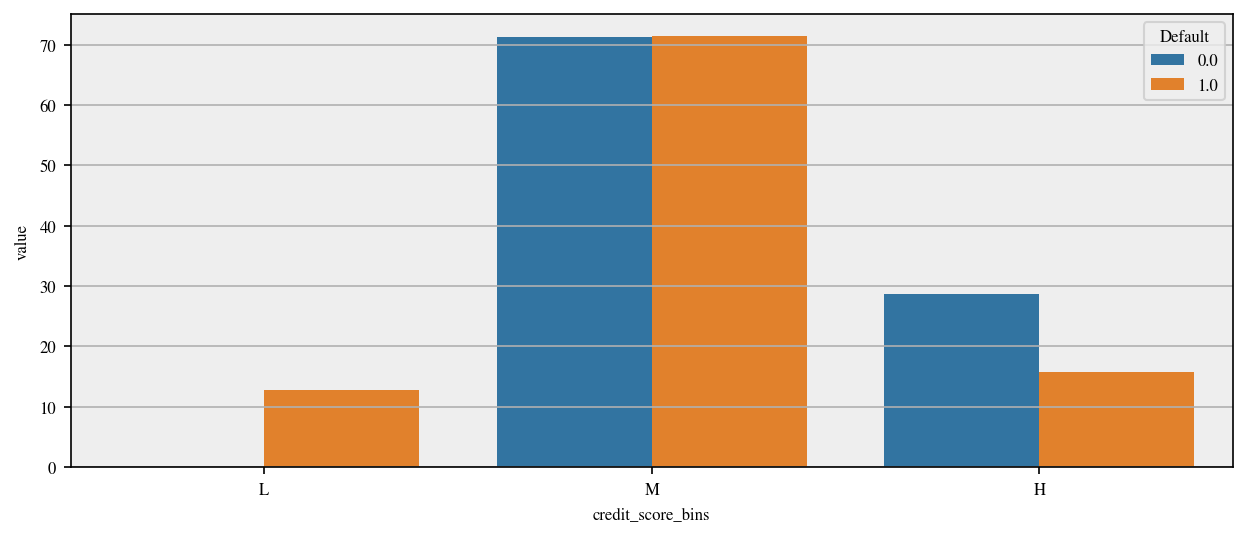

In [447]:
crosstab_plot('credit_score_bins', 'Default', score_ct)
plt.savefig('credit_score_bins_dist.png')

In [448]:
pd.cut(data['Age'], bins=3).value_counts()

(26.0, 34.0]      645
(34.0, 42.0]      226
(17.976, 26.0]    135
Name: Age, dtype: int64

In [449]:
data['age_bins'] = pd.cut(data['Age'], bins=3, labels=['A', 'Y', 'S'])
data['age_bins'].value_counts()

Y    645
S    226
A    135
Name: age_bins, dtype: int64

In [450]:
age_ct = pd.crosstab(data['age_bins'], data['Default'], normalize='index')*100
age_ct

Default,0.0,1.0
age_bins,,
A,5.825243,94.174757
Y,73.307544,26.692456
S,100.000000,0.000000


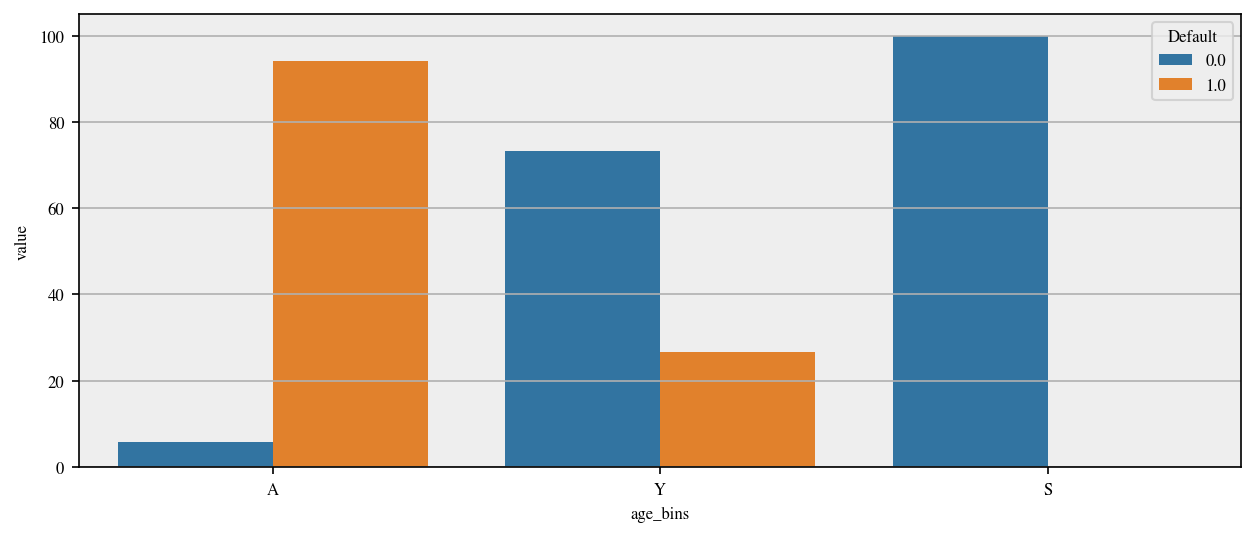

In [451]:
crosstab_plot('age_bins', 'Default', age_ct)

In [452]:
data['term_diff_emp_duration'] = data['Term']-data['Emp_duration']

In [453]:
data['tot_bal_diff_loan_bal'] = - data['Amount']+data['total_bal']

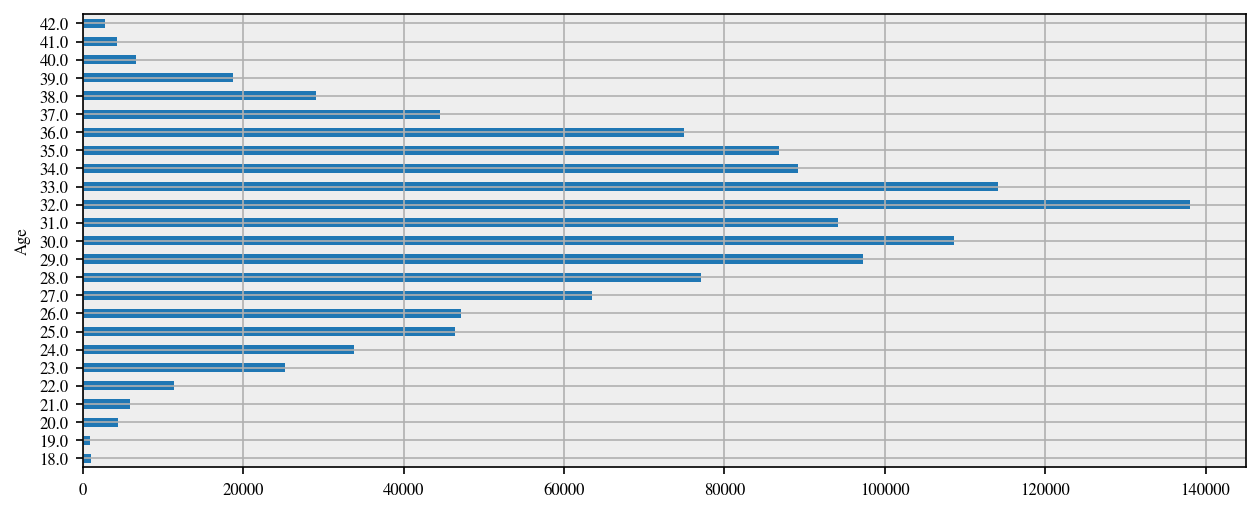

In [454]:
data.groupby(['Age'])['Amount'].sum().plot(kind='barh')

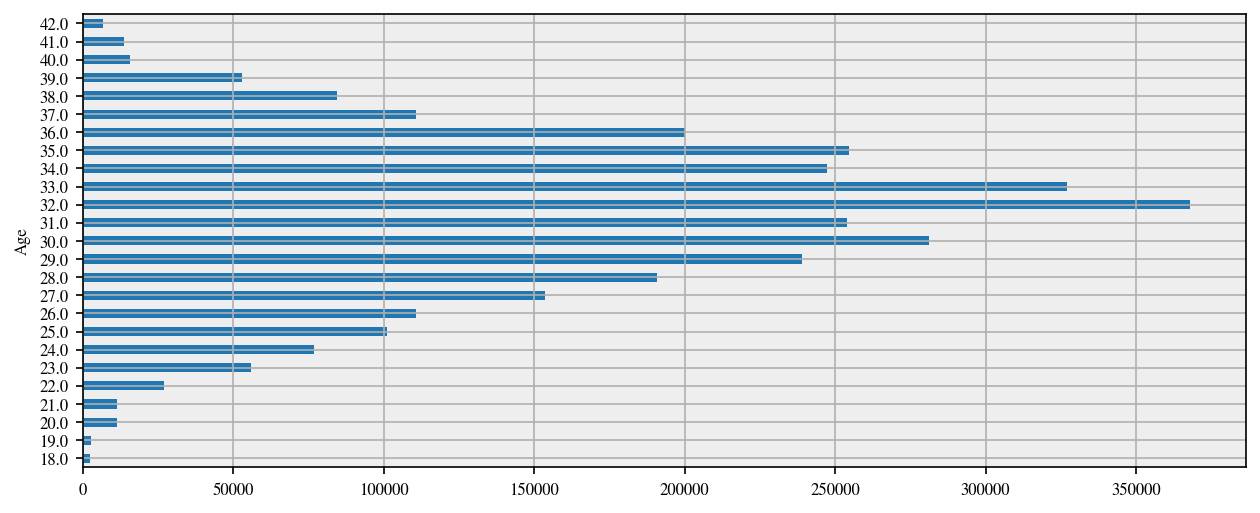

In [300]:
data.groupby(['Age'])['Saving_amount'].sum().plot(kind='barh')

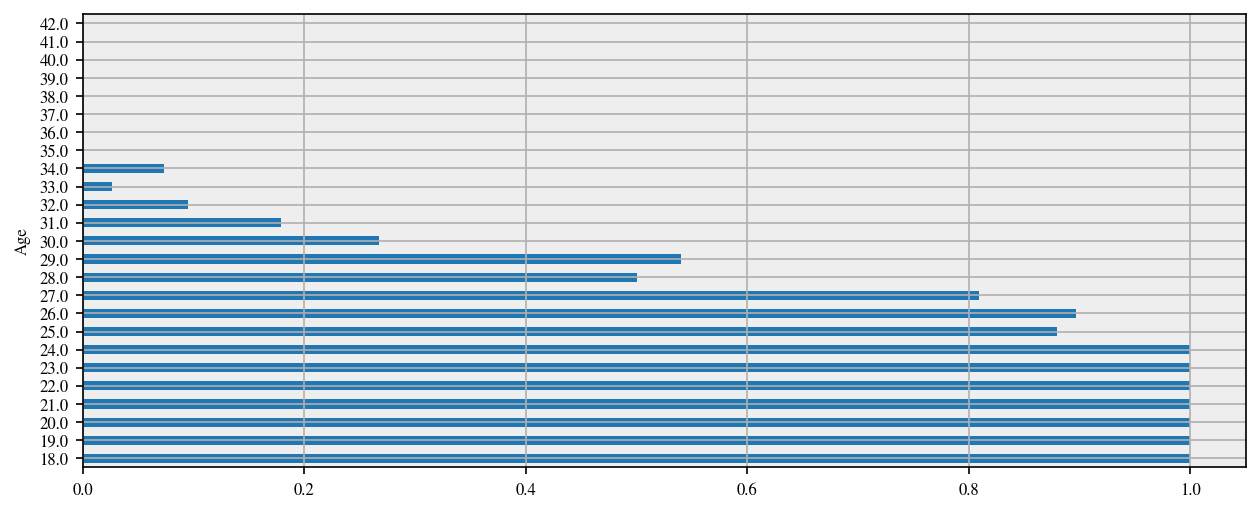

In [313]:
data.groupby(['Age'])['Default'].mean().plot(kind='barh')

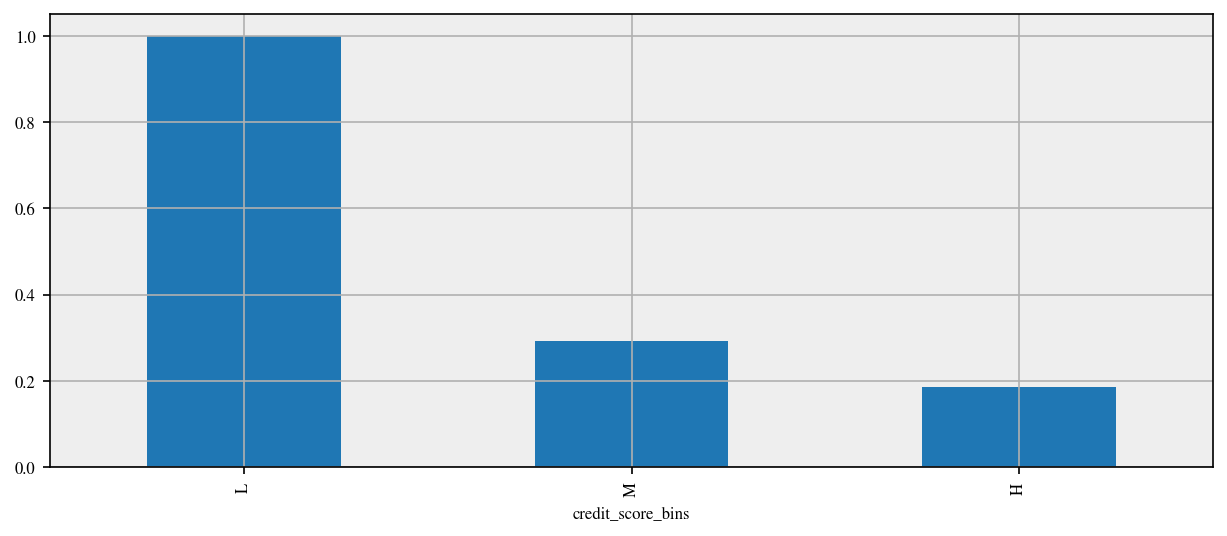

In [315]:
data.groupby(['credit_score_bins'])['Default'].mean().plot(kind='bar')

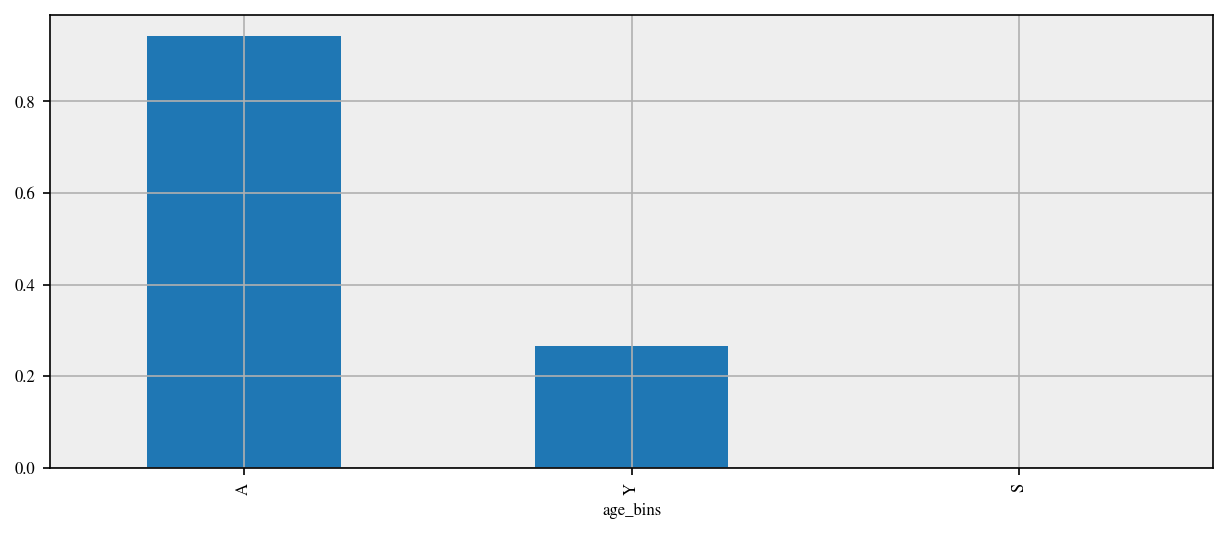

In [316]:
data.groupby(['age_bins'])['Default'].mean().plot(kind='bar')

In [308]:
data['Age_count'] = data.groupby(['Age'])['ID'].transform('count')
data['Age_tot_loan'] = data.groupby(['Age'])['Amount'].transform('sum')
data['Age_mean_loan'] = data.groupby(['Age'])['Amount'].transform('mean')
data['Age_tot_saving_bal'] = data.groupby(['Age'])['Saving_amount'].transform('sum')
data['Age_mean_saving_bal'] = data.groupby(['Age'])['Saving_amount'].transform('mean')
data['Age_flag_mean'] = data.groupby(['Age'])['Default'].transform('mean')

In [309]:
data.shape

(1006, 34)

In [312]:
cat_cols = data.select_dtypes(include='category').columns
cat_cols

Index(['credit_score_bins', 'age_bins'], dtype='object')

In [339]:
age = data.groupby(['age_bins'])['Default'].mean()
data['age_bins'] = data['age_bins'].map(age).astype(float)
data['age_bins'].value_counts()

0.266925    645
0.000000    226
0.941748    135
Name: age_bins, dtype: int64

In [340]:
score = data.groupby(['credit_score_bins'])['Default'].mean()
data['credit_score_bins'] = data['credit_score_bins'].map(score).astype(float)
data['credit_score_bins'].value_counts()

0.293194    713
0.185000    253
1.000000     40
Name: credit_score_bins, dtype: int64

In [341]:
data.head()

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc,bal_status,total_bal,loan_to_tot_bal,loan_to_saving,loan_to_score,total_loan,credit_score_bins,age_bins,term_diff_emp_duration,loan_bal_diff_tot_bal,tot_bal_diff_loan_bal,Age_count,Age_tot_loan,Age_mean_loan,Age_tot_saving_bal,Age_tot_mean_bal,Age_flag_mean
0,101,0.0,988.0,15.0,796.0,0,0,1,0,0,0,0,1536.0,3455.0,12.0,38.0,1.0,0,4443.0,0.345712,0.444573,1.929648,1,0.293194,0.000000,3.0,-2907.0,2907.0,25,29013.0,1160.520000,84550.0,3382.000000,0.000000
1,102,0.0,458.0,15.0,813.0,0,0,1,0,0,0,0,947.0,3600.0,25.0,36.0,1.0,0,4058.0,0.233366,0.263056,1.164822,1,0.185000,0.000000,-10.0,-3111.0,3111.0,61,74891.0,1227.721311,200035.0,3279.262295,0.000000
2,103,0.0,158.0,14.0,756.0,0,0,0,1,0,0,0,1678.0,3093.0,43.0,34.0,1.0,0,3251.0,0.516149,0.542515,2.219577,1,0.293194,0.266925,-29.0,-1573.0,1573.0,75,89144.0,1188.586667,247193.0,3295.906667,0.072727
3,104,1.0,300.0,25.0,737.0,0,0,0,0,0,1,0,1804.0,2449.0,0.0,29.0,1.0,0,2749.0,0.656239,0.736627,2.447761,1,0.293194,0.266925,25.0,-945.0,945.0,78,97245.0,1246.730769,238899.0,3062.807692,0.539683
4,105,1.0,63.0,24.0,662.0,0,0,0,0,0,1,1,1184.0,2867.0,4.0,30.0,1.0,0,2930.0,0.404096,0.412975,1.788520,1,0.293194,0.266925,20.0,-1746.0,1746.0,89,108573.0,1219.921348,281221.0,3159.786517,0.267606


In [342]:
data.shape

(1006, 34)

In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 202
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1006 non-null   int64  
 1   Default                 803 non-null    float64
 2   Checking_amount         1006 non-null   float64
 3   Term                    1006 non-null   float64
 4   Credit_score            1006 non-null   float64
 5   Gender                  1006 non-null   int64  
 6   Marital_status          1006 non-null   int64  
 7   Car_loan                1006 non-null   int64  
 8   Personal_loan           1006 non-null   int64  
 9   Home_loan               1006 non-null   int64  
 10  Education_loan          1006 non-null   int64  
 11  Emp_status              1006 non-null   int64  
 12  Amount                  1006 non-null   float64
 13  Saving_amount           1006 non-null   float64
 14  Emp_duration            1006 non-null   f

In [344]:
final_train = data[data['Default'].isnull()==False].reset_index(drop=True)
final_test = data[data['Default'].isnull()==True].reset_index(drop=True)
final_train.shape, final_test.shape

((803, 34), (203, 34))

In [345]:
drop_cols = ['ID', 'Default']
train_X = final_train[:int(0.9*final_train.shape[0])]
test_X = final_train[int(0.9*final_train.shape[0]):]

In [346]:
X = train_X.drop(drop_cols, axis=1)
y = train_X['Default']
Xtest = test_X.drop(drop_cols, axis=1)
X.shape, Xtest.shape

((722, 32), (81, 32))

In [347]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((541, 32), (541,), (181, 32), (181,))

In [348]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, log_loss

In [349]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

err_lgb_ac = []
err_lgb_f1 = []
err_lgb_prec = []
err_lgb_rec = []
err_lgb_auc = []

y_pred_tot_lgb = []
y_pred_tot_lgb_prob = []


fold = KFold(n_splits=5, shuffle=True, random_state=42)
f = 0
for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    m=LGBMClassifier(n_estimators=1000,random_state=1994,learning_rate=0.03,colsample_bytree=0.2,objective='binary',
                     scale_pos_weight=1)
    m.fit(X_train,y_train,eval_set=[(X_test, y_test)],eval_metric='auc', early_stopping_rounds=200,verbose=200)
    
    y_pred = m.predict(X_test)
    y_pred_prob = m.predict_proba(X_test)[:,1]
    
    test_pred = m.predict(Xtest)
    test_pred_proba = m.predict_proba(Xtest)[:,1]
    
    err_ac = accuracy_score(y_test, y_pred)
    err_f1 = f1_score(y_test, y_pred, average='weighted')
    err_prec = precision_score(y_test, y_pred, average='weighted')
    err_rec = recall_score(y_test, y_pred, average='weighted')
    err_auc = roc_auc_score(y_test, y_pred_prob)
    
    f += 1
    print("Fold:", f)
    print("Accuracy:", err_ac)
    print('F1 Score:', err_f1)
    print("Precision Score:", err_prec)
    print("Recall Score:", err_rec)
    print("AUC Score:", err_auc)
    print('\n')
    
    err_lgb_ac.append(err_ac)
    err_lgb_f1.append(err_f1)
    err_lgb_prec.append(err_prec)
    err_lgb_rec.append(err_rec)
    err_lgb_auc.append(err_auc)
    
    y_pred_tot_lgb.append(test_pred)
    y_pred_tot_lgb_prob.append(test_pred_proba)
    

Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.979196	valid_0's binary_logloss: 0.193468
Early stopping, best iteration is:
[89]	valid_0's auc: 0.983125	valid_0's binary_logloss: 0.212146
Fold: 1
Accuracy: 0.9172413793103448
F1 Score: 0.9144325525382906
Precision Score: 0.9189664309339766
Recall Score: 0.9172413793103448
AUC Score: 0.9831252889505316


Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.982222	valid_0's binary_logloss: 0.181442
[400]	valid_0's auc: 0.981778	valid_0's binary_logloss: 0.197399
Early stopping, best iteration is:
[202]	valid_0's auc: 0.982889	valid_0's binary_logloss: 0.180587
Fold: 2
Accuracy: 0.9103448275862069
F1 Score: 0.9106121741713493
Precision Score: 0.9109763300168097
Recall Score: 0.9103448275862069
AUC Score: 0.9828888888888889


Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.968174	valid_0's binary_logloss: 0.196613
Early stopping, best 

In [350]:
print(np.mean(err_lgb_ac))
print(np.mean(err_lgb_f1))
print(np.mean(err_lgb_prec))
print(np.mean(err_lgb_rec))
print(np.mean(err_lgb_auc))

0.9252394636015324
0.9247217467950701
0.9268092746775464
0.9252394636015324
0.9806866242336408


In [351]:
p = pd.Series(np.mean(y_pred_tot_lgb, 0)).round().astype(int)
p_p = np.mean(y_pred_tot_lgb_prob, axis=0)
print(p.value_counts())
print(accuracy_score(test_X['Default'], p))
print(f1_score(test_X['Default'], p, average='weighted'))
print(precision_score(test_X['Default'], p, average='weighted'))
print(recall_score(test_X['Default'], p, average='weighted'))
print(roc_auc_score(test_X['Default'], p_p))
print(classification_report(test_X['Default'], p))
print(confusion_matrix(test_X['Default'], p))

0    59
1    22
dtype: int64
0.9135802469135802
0.9110830172777076
0.9170518746789934
0.9135802469135802
0.9746227709190672
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94        54
         1.0       0.95      0.78      0.86        27

    accuracy                           0.91        81
   macro avg       0.93      0.88      0.90        81
weighted avg       0.92      0.91      0.91        81

[[53  1]
 [ 6 21]]


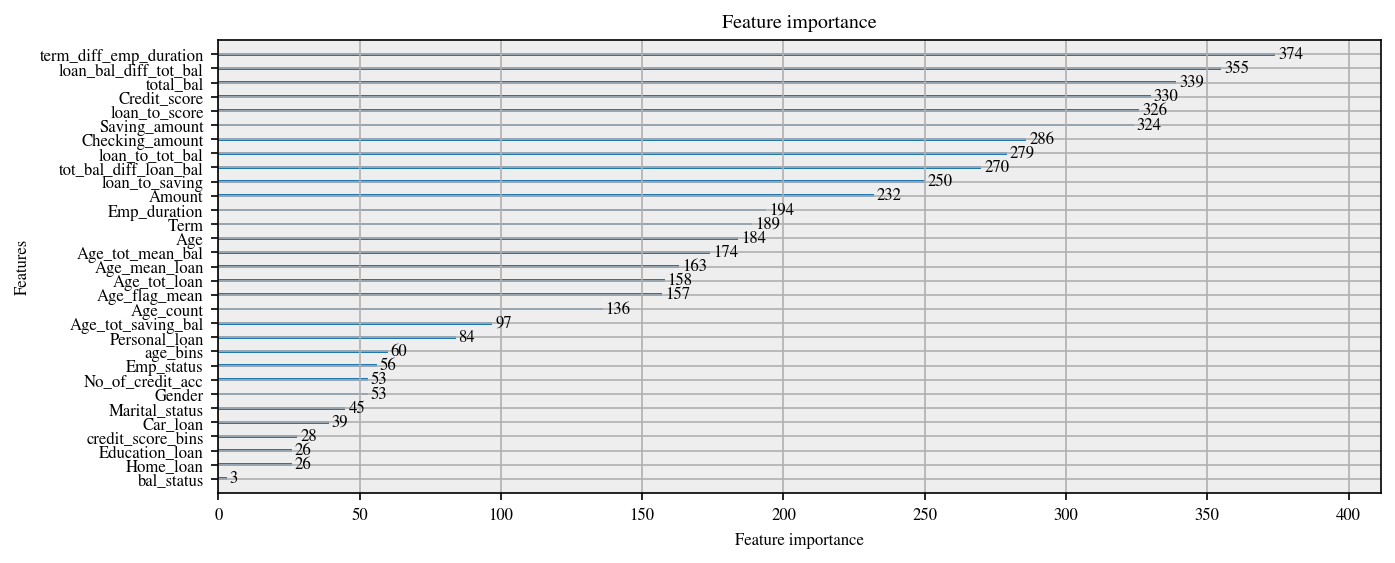

In [352]:
from lightgbm import plot_importance
plot_importance(m, max_num_features=40)

In [353]:
from xgboost import XGBClassifier

err_xgb_ac = []
err_xgb_f1 = []
err_xgb_prec = []
err_xgb_rec = []
err_xgb_auc = []

y_pred_tot_xgb = []
y_pred_tot_xgb_prob = []


fold = KFold(n_splits=5, shuffle=True, random_state=42)
f = 0
for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    m=XGBClassifier(n_estimators=1000,random_state=1994,eval_metric='auc',learning_rate=0.1)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200,verbose=200)
    
    y_pred = m.predict(X_test)
    y_pred_prob = m.predict_proba(X_test)[:,1]
    
    test_pred = m.predict(Xtest)
    test_pred_proba = m.predict_proba(Xtest)[:,1]
    
    err_ac = accuracy_score(y_test, y_pred)
    err_f1 = f1_score(y_test, y_pred, average='weighted')
    err_prec = precision_score(y_test, y_pred, average='weighted')
    err_rec = recall_score(y_test, y_pred, average='weighted')
    err_auc = roc_auc_score(y_test, y_pred_prob)
    
    f += 1
    print("Fold:", f)
    print("Accuracy:", err_ac)
    print('F1 Score:', err_f1)
    print("Precision Score:", err_prec)
    print("Recall Score:", err_rec)
    print("AUC Score:", err_auc)
    print('\n')
    
    err_xgb_ac.append(err_ac)
    err_xgb_f1.append(err_f1)
    err_xgb_prec.append(err_prec)
    err_xgb_rec.append(err_rec)
    err_xgb_auc.append(err_auc)
    
    y_pred_tot_xgb.append(test_pred)
    y_pred_tot_xgb_prob.append(test_pred_proba)
    

[0]	validation_0-auc:0.945717	validation_1-auc:0.897134
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:1	validation_1-auc:0.973648
[400]	validation_0-auc:1	validation_1-auc:0.972954
Stopping. Best iteration:
[226]	validation_0-auc:1	validation_1-auc:0.974804

Fold: 1
Accuracy: 0.9103448275862069
F1 Score: 0.9085699036617633
Precision Score: 0.9094905250077663
Recall Score: 0.9103448275862069
AUC Score: 0.9748035136384651


[0]	validation_0-auc:0.96425	validation_1-auc:0.928
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:1	validation_1-auc:0.985333
Stopping. Best iteration:
[165]	validation_0-auc:1	validation_1-auc:0.985778

Fold: 2
Accuracy: 0.9310344827586207
F1 Score: 0.9305921971507495
Precision Score: 0.930562762394452

In [354]:
print(np.mean(err_xgb_ac))
print(np.mean(err_xgb_f1))
print(np.mean(err_xgb_prec))
print(np.mean(err_xgb_rec))
print(np.mean(err_xgb_auc))

0.9321647509578543
0.9316994312822446
0.9331216641028377
0.9321647509578543
0.9811093077215975


In [355]:
p = pd.Series(np.mean(y_pred_tot_xgb, 0)).round().astype(int)
p_p = np.mean(y_pred_tot_xgb_prob, axis=0)
print(p.value_counts())
print(accuracy_score(test_X['Default'], p))
print(f1_score(test_X['Default'], p, average='weighted'))
print(precision_score(test_X['Default'], p, average='weighted'))
print(recall_score(test_X['Default'], p, average='weighted'))
print(roc_auc_score(test_X['Default'], p_p))
print(classification_report(test_X['Default'], p))
print(confusion_matrix(test_X['Default'], p))

0    58
1    23
dtype: int64
0.9259259259259259
0.9242857142857143
0.9280359820089955
0.9259259259259259
0.9794238683127572
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        54
         1.0       0.96      0.81      0.88        27

    accuracy                           0.93        81
   macro avg       0.94      0.90      0.91        81
weighted avg       0.93      0.93      0.92        81

[[53  1]
 [ 5 22]]


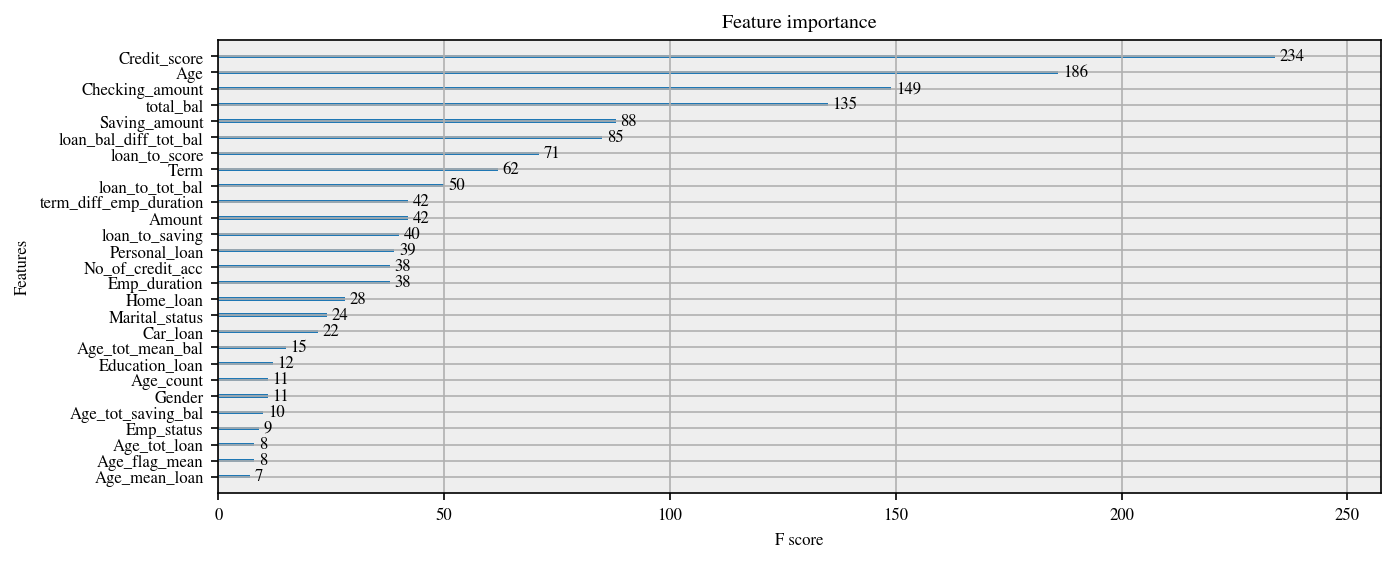

In [356]:
from xgboost import plot_importance
plot_importance(m, max_num_features=40)

In [357]:
categorical_features_indices = np.where(X.dtypes == 'object')[0]
categorical_features_indices

array([], dtype=int64)

In [359]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
# from catoost import catClassifier
from catboost import CatBoostClassifier

err_cat_ac = []
err_cat_f1 = []
err_cat_prec = []
err_cat_rec = []
err_cat_auc = []

y_pred_tot_cat = []
y_pred_tot_cat_prob = []


fold = KFold(n_splits=5, shuffle=True, random_state=42)
f = 0
for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    cat = CatBoostClassifier( 
                         eval_metric='AUC', 
                         depth=6,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.07,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1, 
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=50)
    cat.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=50, cat_features=categorical_features_indices)
    y_pred = cat.predict(X_test)
    y_pred_prob = cat.predict_proba(X_test)[:,1]
    
    err_ac = accuracy_score(y_test, y_pred)
    err_f1 = f1_score(y_test, y_pred, average='weighted')
    err_prec = precision_score(y_test, y_pred, average='weighted')
    err_rec = recall_score(y_test, y_pred, average='weighted')
    err_auc = roc_auc_score(y_test, y_pred_prob)
    
    f += 1
    print("Fold:", f)
    print("Accuracy:", err_ac)
    print('F1 Score:', err_f1)
    print("Precision Score:", err_prec)
    print("Recall Score:", err_rec)
    print("AUC Score:", err_auc)
    print('\n')
    
    test_pred = cat.predict(Xtest)
    test_pred_proba = cat.predict_proba(Xtest)[:,1]
    
    err_cat_ac.append(err_ac)
    err_cat_f1.append(err_f1)
    err_cat_prec.append(err_prec)
    err_cat_rec.append(err_rec)
    err_cat_auc.append(err_auc)
    
    y_pred_tot_cat.append(test_pred)
    y_pred_tot_cat_prob.append(test_pred_proba)
    

Fold: 1
Accuracy: 0.9103448275862069
F1 Score: 0.9077427995349316
Precision Score: 0.9105956112852664
Recall Score: 0.9103448275862069
AUC Score: 0.9754969949144706


Fold: 2
Accuracy: 0.9172413793103448
F1 Score: 0.9167106365808995
Precision Score: 0.9165841156029373
Recall Score: 0.9172413793103448
AUC Score: 0.9704444444444444


Fold: 3
Accuracy: 0.9444444444444444
F1 Score: 0.9449133840891536
Precision Score: 0.9458282458282459
Recall Score: 0.9444444444444444
AUC Score: 0.9772669866127811


Fold: 4
Accuracy: 0.9375
F1 Score: 0.9356958207669108
Precision Score: 0.9396788990825686
Recall Score: 0.9375
AUC Score: 0.9864612511671335


Fold: 5
Accuracy: 0.9652777777777778
F1 Score: 0.9653965034289578
Precision Score: 0.9656247601504337
Recall Score: 0.9652777777777778
AUC Score: 0.9880952380952381




In [360]:
print(np.mean(err_cat_ac))
print(np.mean(err_cat_f1))
print(np.mean(err_cat_prec))
print(np.mean(err_cat_rec))
print(np.mean(err_cat_auc))

0.9349616858237548
0.9340918288801706
0.9356623263898903
0.9349616858237548
0.9795529830468135


In [361]:
p = pd.Series(np.mean(y_pred_tot_cat, 0)).round().astype(int)
p_p = np.mean(y_pred_tot_cat_prob, axis=0)
print(p.value_counts())
print(accuracy_score(test_X['Default'], p))
print(f1_score(test_X['Default'], p, average='weighted'))
print(precision_score(test_X['Default'], p, average='weighted'))
print(recall_score(test_X['Default'], p, average='weighted'))
print(roc_auc_score(test_X['Default'], p_p))
print(classification_report(test_X['Default'], p))
print(confusion_matrix(test_X['Default'], p))

0    58
1    23
dtype: int64
0.9012345679012346
0.8990476190476191
0.9020489755122438
0.9012345679012346
0.98079561042524
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93        54
         1.0       0.91      0.78      0.84        27

    accuracy                           0.90        81
   macro avg       0.90      0.87      0.88        81
weighted avg       0.90      0.90      0.90        81

[[52  2]
 [ 6 21]]


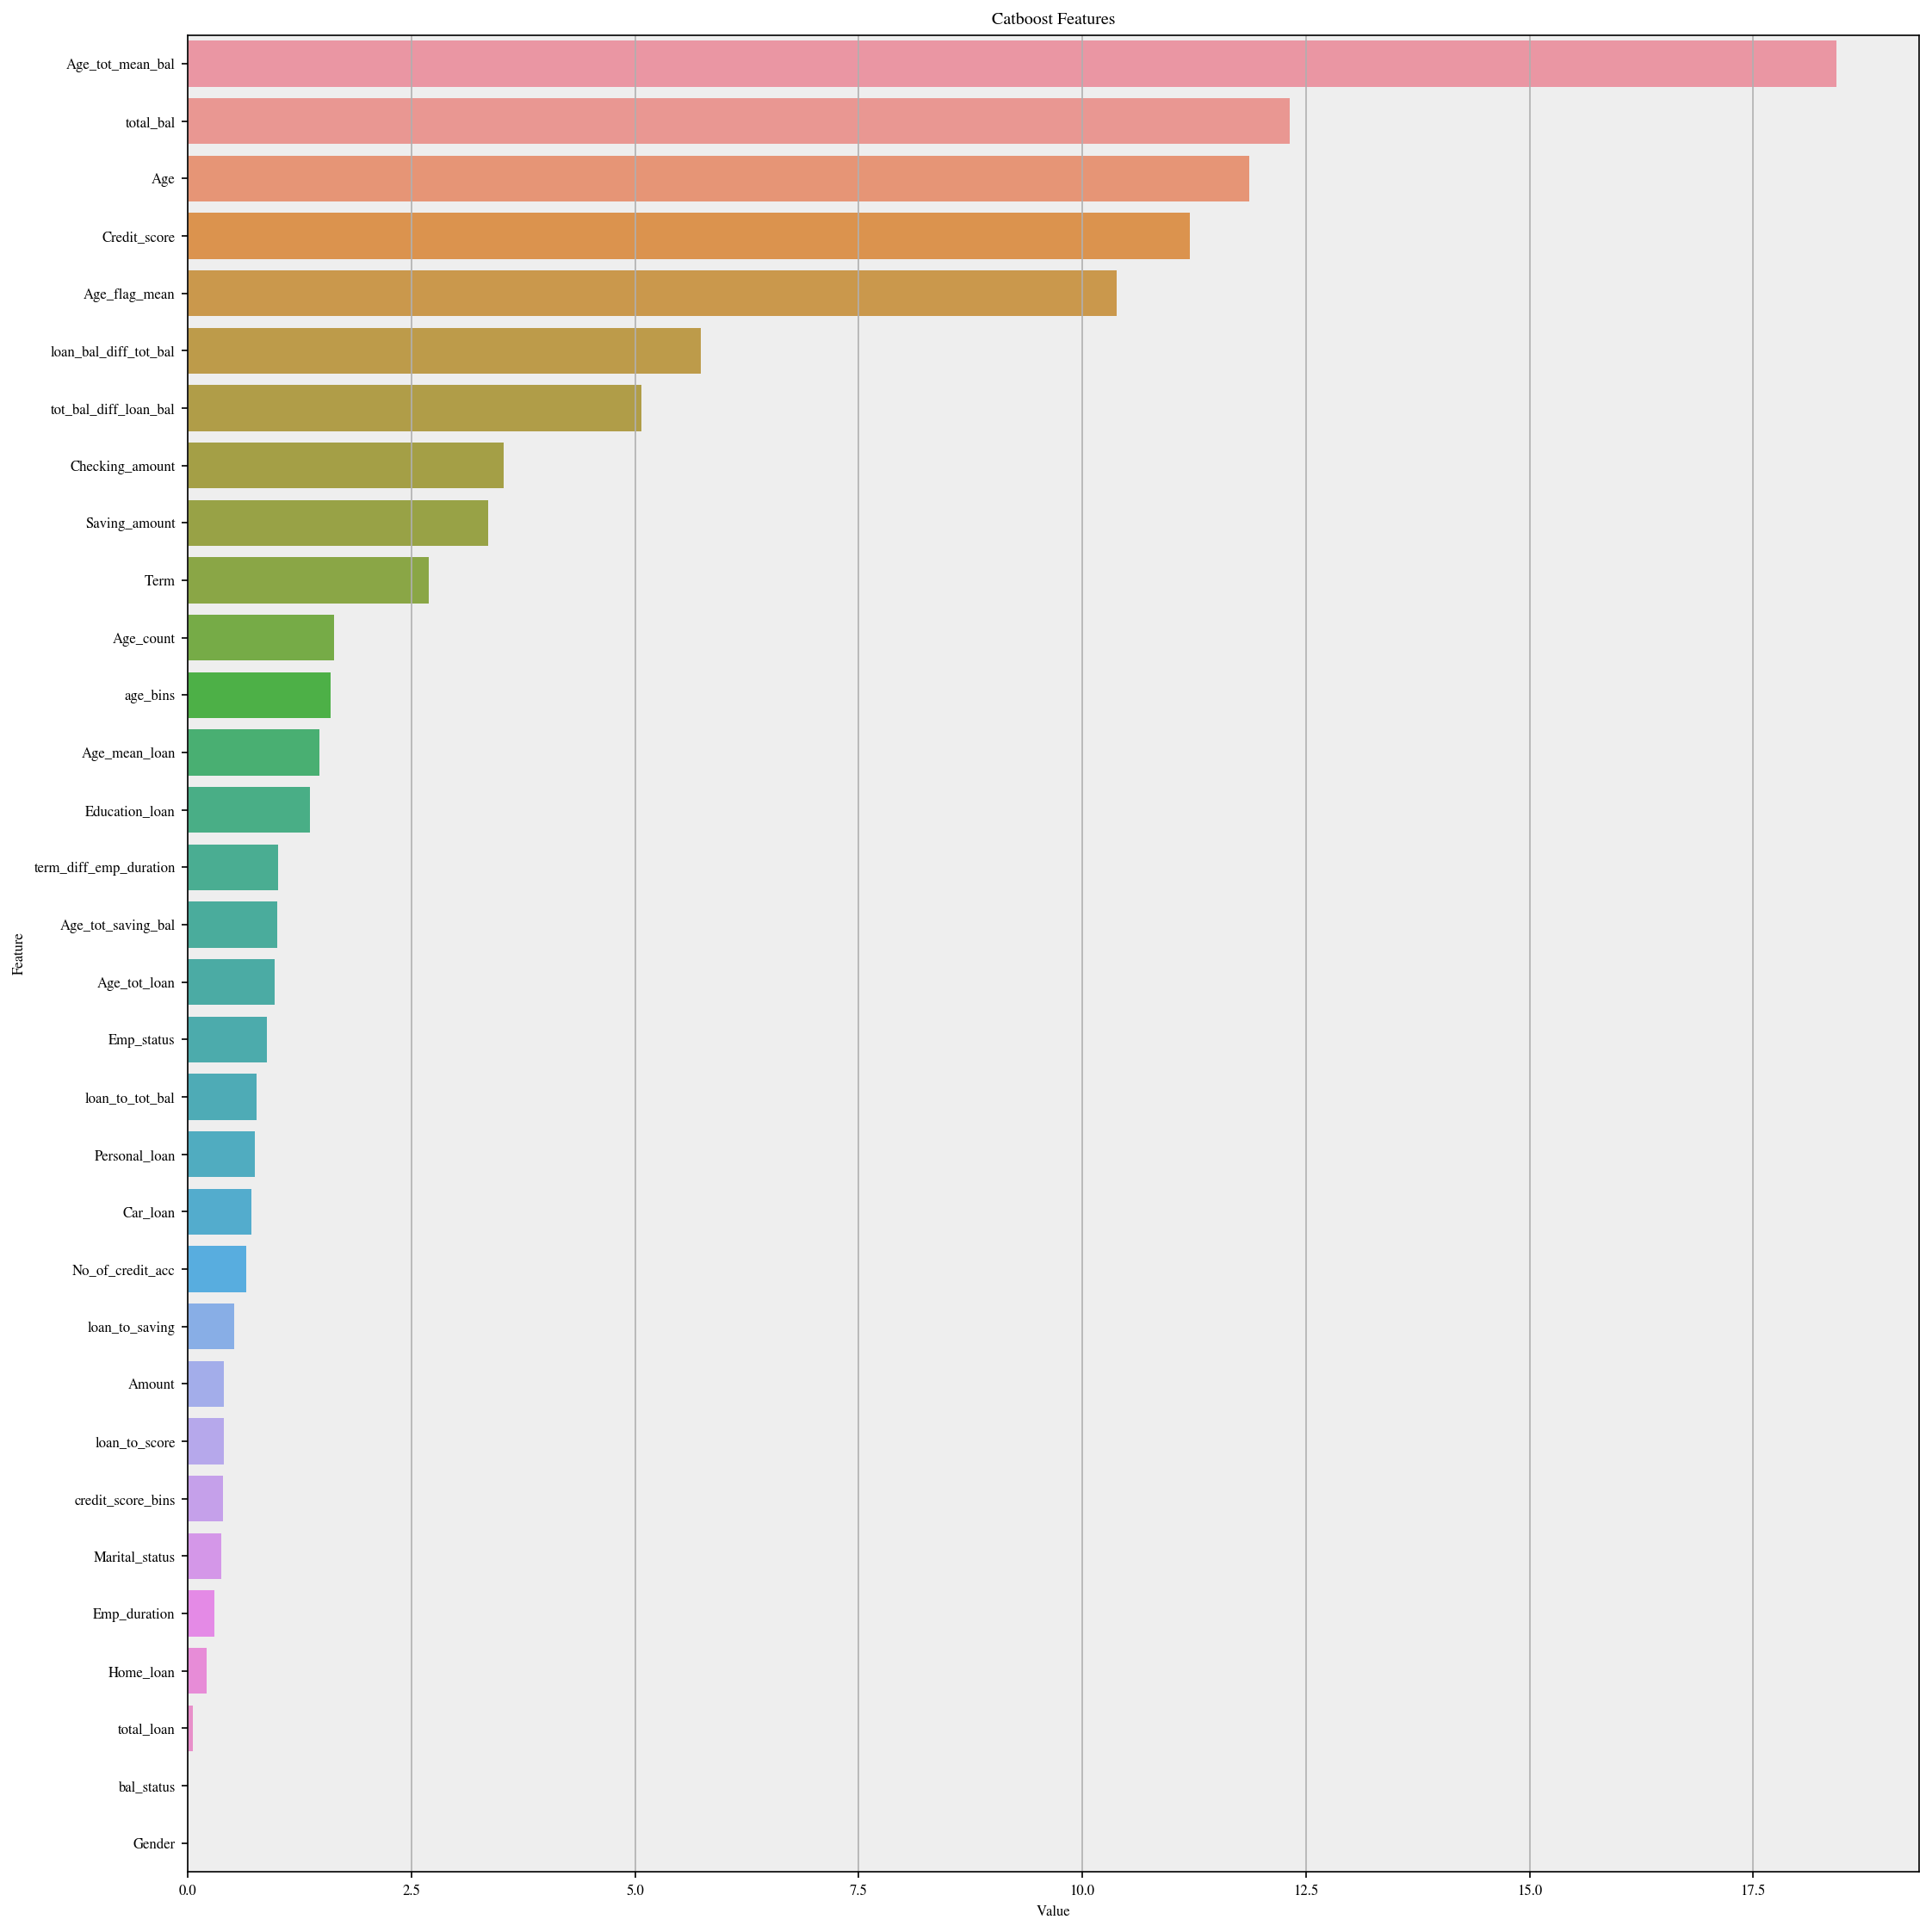

In [362]:
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15,15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [363]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression

err_lr_ac = []
err_lr_f1 = []
err_lr_prec = []
err_lr_rec = []
err_lr_auc = []

y_pred_tot_lr = []
y_pred_tot_lr_prob = []


fold = KFold(n_splits=5, shuffle=True, random_state=42)
f = 0
for train_index, test_index in fold.split(X):
    f += 1
    print('*'*30+'Fold '+str(f)+'*'*30)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    y_pred_prob = lr.predict_proba(X_test)[:,1]
    
    err_ac = accuracy_score(y_test, y_pred)
    err_f1 = f1_score(y_test, y_pred, average='weighted')
    err_prec = precision_score(y_test, y_pred, average='weighted')
    err_rec = recall_score(y_test, y_pred, average='weighted')
    err_log = roc_auc_score(y_test, y_pred_prob)
    print("Accuracy:", err_ac)
    print('F1 Score:', err_f1)
    print("Precision Score:", err_prec)
    print("Recall Score:", err_rec)
    print("AUC Score:", err_auc)
    
    test_pred = lr.predict(Xtest)
    test_pred_proba = lr.predict_proba(Xtest)[:,1]
    
    err_lr_ac.append(err_ac)
    err_lr_f1.append(err_f1)
    err_lr_prec.append(err_prec)
    err_lr_rec.append(err_rec)
    err_lr_auc.append(err_auc)
    
    y_pred_tot_lr.append(test_pred)
    y_pred_tot_lr_prob.append(test_pred_proba)
    

******************************Fold 1******************************
Accuracy: 0.896551724137931
F1 Score: 0.8935493840787672
Precision Score: 0.8958620689655172
Recall Score: 0.896551724137931
AUC Score: 0.9880952380952381
******************************Fold 2******************************
Accuracy: 0.903448275862069
F1 Score: 0.9028290760110494
Precision Score: 0.902605468811422
Recall Score: 0.903448275862069
AUC Score: 0.9880952380952381
******************************Fold 3******************************
Accuracy: 0.875
F1 Score: 0.877014652014652
Precision Score: 0.8805647643855079
Recall Score: 0.875
AUC Score: 0.9880952380952381
******************************Fold 4******************************
Accuracy: 0.875
F1 Score: 0.8740824058726023
Precision Score: 0.8735576923076924
Recall Score: 0.875
AUC Score: 0.9880952380952381
******************************Fold 5******************************
Accuracy: 0.9027777777777778
F1 Score: 0.9020640934564685
Precision Score: 0.9017628205128205
R

C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

In [364]:
print(np.mean(err_lr_ac))
print(np.mean(err_lr_f1))
print(np.mean(err_lr_prec))
print(np.mean(err_lr_rec))
print(np.mean(err_lr_auc))

0.8905555555555555
0.889907922286708
0.8908705629965921
0.8905555555555555
0.9880952380952381


In [365]:
p = pd.Series(np.mean(y_pred_tot_lr, 0)).round().astype(int)
p_p = np.mean(y_pred_tot_lr_prob, axis=0)
print(p.value_counts())
print(accuracy_score(test_X['Default'], p))
print(f1_score(test_X['Default'], p, average='weighted'))
print(precision_score(test_X['Default'], p, average='weighted'))
print(recall_score(test_X['Default'], p, average='weighted'))
print(roc_auc_score(test_X['Default'], p_p))
print(classification_report(test_X['Default'], p))
print(confusion_matrix(test_X['Default'], p))

0    56
1    25
dtype: int64
0.9012345679012346
0.9002331002331
0.9004761904761905
0.9012345679012346
0.9492455418381344
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93        54
         1.0       0.88      0.81      0.85        27

    accuracy                           0.90        81
   macro avg       0.90      0.88      0.89        81
weighted avg       0.90      0.90      0.90        81

[[51  3]
 [ 5 22]]


In [366]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

err_rf_ac = []
err_rf_f1 = []
err_rf_prec = []
err_rf_rec = []
err_rf_auc = []

y_pred_tot_rf = []
y_pred_tot_rf_prob = []


fold = KFold(n_splits=5, shuffle=True, random_state=42)
f = 0

for train_index, test_index in fold.split(X):
    f += 1
    print('*'*30+'Fold '+str(f)+'*'*30)
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    y_pred_prob = rf.predict_proba(X_test)[:,1]
    
    err_ac = accuracy_score(y_test, y_pred)
    err_f1 = f1_score(y_test, y_pred, average='weighted')
    err_prec = precision_score(y_test, y_pred, average='weighted')
    err_rec = recall_score(y_test, y_pred, average='weighted')
    err_auc = roc_auc_score(y_test, y_pred_prob)
    
    print("Accuracy:", err_ac)
    print('F1 Score:', err_f1)
    print("Precision Score:", err_prec)
    print("Recall Score:", err_rec)
    print("AUC Score:", err_auc)
    
    test_pred = rf.predict(Xtest)
    test_pred_proba = rf.predict_proba(Xtest)[:,1]
    
    err_rf_ac.append(err_ac)
    err_rf_f1.append(err_f1)
    err_rf_prec.append(err_prec)
    err_rf_rec.append(err_rec)
    err_rf_auc.append(err_auc)
    
    y_pred_tot_rf.append(test_pred)
    y_pred_tot_rf_prob.append(test_pred_proba)
    

******************************Fold 1******************************
Accuracy: 0.9103448275862069
F1 Score: 0.9077427995349316
Precision Score: 0.9105956112852664
Recall Score: 0.9103448275862069
AUC Score: 0.9640545538603792
******************************Fold 2******************************
Accuracy: 0.9241379310344827
F1 Score: 0.923900451250142
Precision Score: 0.9237639281169495
Recall Score: 0.9241379310344827
AUC Score: 0.9722222222222223
******************************Fold 3******************************
Accuracy: 0.8958333333333334
F1 Score: 0.8978837340762724
Precision Score: 0.9023984593837535
Recall Score: 0.8958333333333334
AUC Score: 0.9667845415508968
******************************Fold 4******************************
Accuracy: 0.9166666666666666
F1 Score: 0.9138530287984111
Precision Score: 0.9184491978609626
Recall Score: 0.9166666666666666
AUC Score: 0.9864612511671335
******************************Fold 5******************************
Accuracy: 0.9583333333333334
F1 Score:

In [367]:
print(np.mean(err_rf_ac))
print(np.mean(err_rf_f1))
print(np.mean(err_rf_prec))
print(np.mean(err_rf_rec))
print(np.mean(err_rf_auc))

0.9210632183908046
0.9203983144980118
0.9229050756930228
0.9210632183908046
0.9742163718366903


In [368]:
p = pd.Series(np.mean(y_pred_tot_rf, 0)).round().astype(int)
p_p = np.mean(y_pred_tot_rf_prob, axis=0)
print(p.value_counts())
print(accuracy_score(test_X['Default'], p))
print(f1_score(test_X['Default'], p, average='weighted'))
print(precision_score(test_X['Default'], p, average='weighted'))
print(recall_score(test_X['Default'], p, average='weighted'))
print(roc_auc_score(test_X['Default'], p_p))
print(classification_report(test_X['Default'], p))
print(confusion_matrix(test_X['Default'], p))

0    59
1    22
dtype: int64
0.9135802469135802
0.9110830172777076
0.9170518746789934
0.9135802469135802
0.9708504801097393
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94        54
         1.0       0.95      0.78      0.86        27

    accuracy                           0.91        81
   macro avg       0.93      0.88      0.90        81
weighted avg       0.92      0.91      0.91        81

[[53  1]
 [ 6 21]]


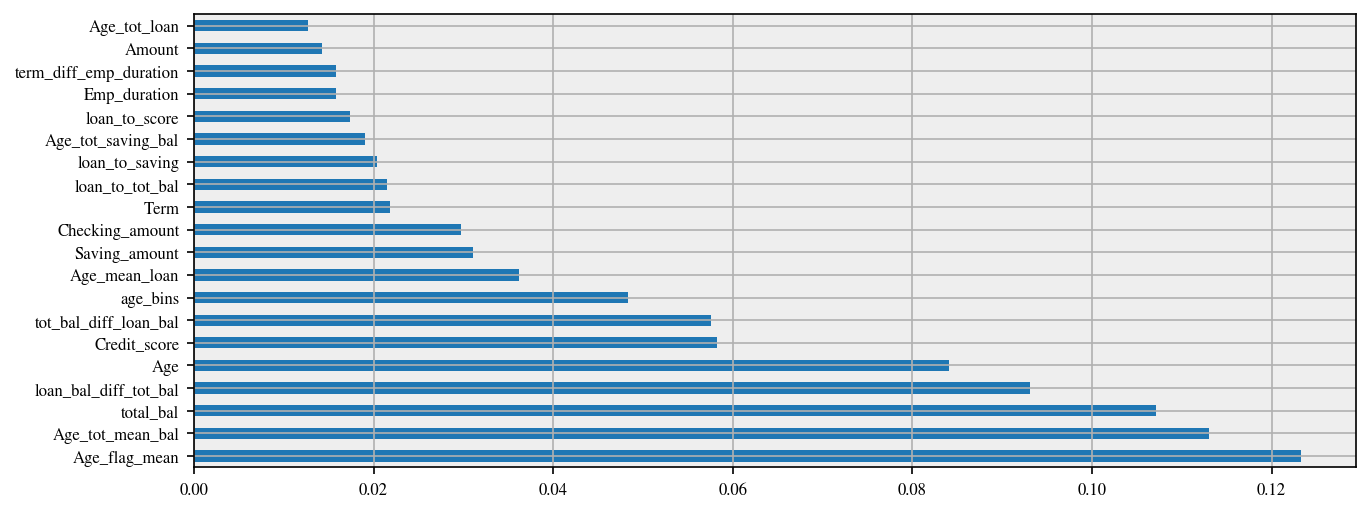

In [369]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [373]:
final_train.shape, final_test.shape

((803, 34), (203, 34))

In [375]:
final_train.head(3)

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc,bal_status,total_bal,loan_to_tot_bal,loan_to_saving,loan_to_score,total_loan,credit_score_bins,age_bins,term_diff_emp_duration,loan_bal_diff_tot_bal,tot_bal_diff_loan_bal,Age_count,Age_tot_loan,Age_mean_loan,Age_tot_saving_bal,Age_tot_mean_bal,Age_flag_mean
0,101,0.0,988.0,15.0,796.0,0,0,1,0,0,0,0,1536.0,3455.0,12.0,38.0,1.0,0,4443.0,0.345712,0.444573,1.929648,1,0.293194,0.000000,3.0,-2907.0,2907.0,25,29013.0,1160.520000,84550.0,3382.000000,0.000000
1,102,0.0,458.0,15.0,813.0,0,0,1,0,0,0,0,947.0,3600.0,25.0,36.0,1.0,0,4058.0,0.233366,0.263056,1.164822,1,0.185000,0.000000,-10.0,-3111.0,3111.0,61,74891.0,1227.721311,200035.0,3279.262295,0.000000
2,103,0.0,158.0,14.0,756.0,0,0,0,1,0,0,0,1678.0,3093.0,43.0,34.0,1.0,0,3251.0,0.516149,0.542515,2.219577,1,0.293194,0.266925,-29.0,-1573.0,1573.0,75,89144.0,1188.586667,247193.0,3295.906667,0.072727


In [376]:
final_train.to_csv('Final_train_fe.csv', index=False)
final_test.to_csv('Final_test_fe.csv', index=False)